In [18]:
%matplotlib inline
import healpy as hp
import pandas as pd
import numpy as np
import astropy.io.fits as fits

In [14]:
fits.setval('/work1/users/aaronb/Databrary/pixel_coords_map_nested_ns2048.fits', keyword = 'NSIDE', value = 2048, ext=1)

In [16]:
coords = pd.DataFrame()
coords['GLON'] = hp.read_map('/work1/users/aaronb/Databrary/pixel_coords_map_nested_ns2048.fits',field=1, nest=True)
coords['GLAT'] = hp.read_map('/work1/users/aaronb/Databrary/pixel_coords_map_nested_ns2048.fits',field=2, nest=True)


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


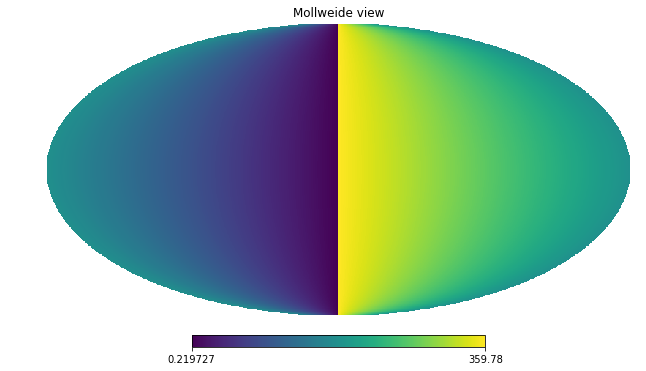

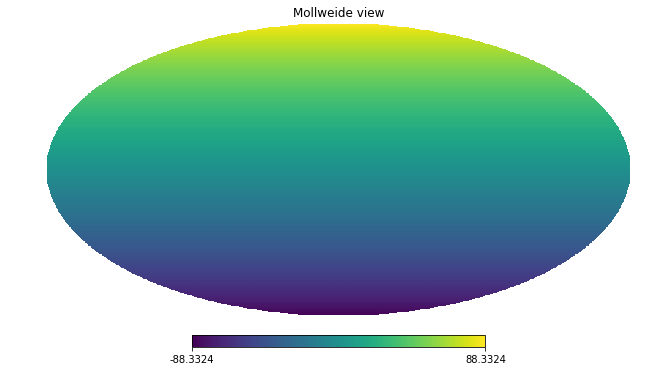

In [20]:
hp.mollview(coords['GLON'],nest=True)
hp.mollview(coords['GLAT'],nest=True)

In [23]:
irc = pd.DataFrame()
irc['9'] = hp.read_map('/work1/users/aaronb/Databrary/HEALPix/AKARI_HEALPix_orig/2048_nside/akari_9_2048.fits',nest=True)


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


In [21]:
start = -90
stop = 90
step = 1

glat_intervs = np.arange(start,stop,step)

start = 0
stop = 360
step = 1

glon_intervs = np.arange(start,stop,step)

glats = [np.where(np.logical_and(coords['GLAT']>i, coords['GLAT']< i+1))  for i in glat_intervs]

glons = [np.where(np.logical_and(coords['GLON']>i, coords['GLON']< i+1))  for i in glon_intervs]

In [25]:

irc9_med_glats = [irc['9'].iloc[i].median() for i in glats]

irc9_med_glons = [irc['9'].iloc[i].median()  for i in glons]

#bb_corr_glats_A9 = [bb_corr_glats[i]['A9']]

#irc9_corr_glats_pn = pd.Panel({i: irc9_corr_glats[i] for i in glat_intervs})
#irc9_corr_glons_pn = pd.Panel({i: irc9_corr_glons[i] for i in glon_intervs})

ValueError: x and y must be the same size

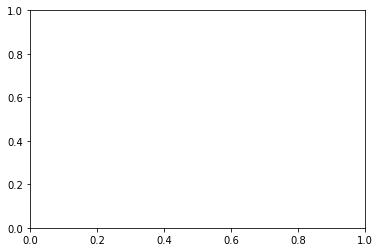

In [26]:
import matplotlib.pyplot as plt
plt.scatter(irc9_med_glats,irc9_corr_glons, alpha=0.5)